**Конкурентный анализ и выбор географического расположения**

In [51]:
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy

In [52]:
from requests.compat import urljoin, quote_plus, urlparse, unquote

In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
import re

In [54]:
import requests
import chardet


In [55]:
water_links = []
water_names = []
water_price = []

for j in range(1, 4):
  url = 'https://rusarctica.ru/catalog/butylki/?ysclid=m8diu9c3c0899709461?page=' + str(j)

  response = requests.get(url)
  encoding = chardet.detect(response.content)['encoding']  # Определяем кодировку
  html = response.content.decode(encoding)  # Декодируем с правильной кодировкой
  soup = BeautifulSoup(html, 'lxml')

  html_water = soup.find_all('div', {'class': 'catalog-card'})

  for i in html_water:
    new_soup = BeautifulSoup(str(i), 'lxml')
    s = new_soup.find_all('a')
    k = new_soup.find_all('div', {'class': 'catalog-card__price'})

    water_links.append('https://www.rusarctica.ru/' + str(s[0]['href']))
    water_names.append(s[0].text.strip().lower())
    water_price.append(str(k[0].text)[1:-3])

print(k)
print(s)
print(water_links)
print(water_names)
print(water_price)

print(len(water_links))
print(len(water_names))
print(len(water_price))



[<div class="catalog-card__price">
<span class="catalog-card__price-current">1 112 ₽</span>
</div>]
[<a class="catalog-card__top" href="/product/720-500-butylka-tritanovaya-500-ml-golubaya-matovaya-s-sitechkom/">
<div class="catalog-card__title">
                    Питьевая бутылка 720 из тритана 0.5л, голубая матовая, с ситечком                                    </div>
<div class="catalog-card__picture">
<img class="lazyload" data-src="/upload/resize_cache/iblock/c32/buy3bstpp25vdu6i3sjdh5bkdna54o23/220_256_1/720_500_butylka_tritanovaya_500_ml_golubaya_matovaya_s_sitechkom.jpg" src="/include/loader/loader-background-big.svg"/>
</div>
</a>]
['https://www.rusarctica.ru//product/702-500-termos-cititerm-teksturnyy-zheltyy-los/', 'https://www.rusarctica.ru//product/702-500-termos-cititerm-teksturnyy-krasnyy-atstek/', 'https://www.rusarctica.ru//product/721-700-butylka-tritanovaya-700-ml-lavandovaya/', 'https://www.rusarctica.ru//product/722-550-butylka-tritanovaya-550-ml-lavandovaya-s-ma

In [56]:
import pandas as pd

water_data = {'Ссылка': water_links, 'Название': water_names, 'Цена': water_price}
df = pd.DataFrame(water_data)

print(df)

                                               Ссылка  \
0   https://www.rusarctica.ru//product/702-500-ter...   
1   https://www.rusarctica.ru//product/702-500-ter...   
2   https://www.rusarctica.ru//product/721-700-but...   
3   https://www.rusarctica.ru//product/722-550-but...   
4   https://www.rusarctica.ru//product/722-550-but...   
..                                                ...   
67  https://www.rusarctica.ru//product/720-1000-bu...   
68  https://www.rusarctica.ru//product/720-1000-bu...   
69  https://www.rusarctica.ru//product/720-500-but...   
70  https://www.rusarctica.ru//product/720-500-but...   
71  https://www.rusarctica.ru//product/720-500-but...   

                                             Название   Цена  
0    желтая термокружка 702 «сититерм» «лось» на 0.5л  1 811  
1   красная термокружка 702 «сититерм» «ацтек» на ...  1 811  
2         лавандовая питьевая бутылка из тритана 0.7л  1 229  
3   лавандовая тритановая бутылка 722 с манжетом и...  1 357  


In [57]:
import pandas as pd

water_data = {'Ссылка': water_links, 'Название': "Товар 1", 'Цена': water_price}
df = pd.DataFrame(water_data)

print(df)

                                               Ссылка Название   Цена
0   https://www.rusarctica.ru//product/702-500-ter...  Товар 1  1 811
1   https://www.rusarctica.ru//product/702-500-ter...  Товар 1  1 811
2   https://www.rusarctica.ru//product/721-700-but...  Товар 1  1 229
3   https://www.rusarctica.ru//product/722-550-but...  Товар 1  1 357
4   https://www.rusarctica.ru//product/722-550-but...  Товар 1  1 357
..                                                ...      ...    ...
67  https://www.rusarctica.ru//product/720-1000-bu...  Товар 1  1 544
68  https://www.rusarctica.ru//product/720-1000-bu...  Товар 1  1 544
69  https://www.rusarctica.ru//product/720-500-but...  Товар 1  1 112
70  https://www.rusarctica.ru//product/720-500-but...  Товар 1  1 112
71  https://www.rusarctica.ru//product/720-500-but...  Товар 1  1 112

[72 rows x 3 columns]


In [58]:
grid_links = []
grid_names = []
grid_price = []


for j in range(1, 6):
  url = 'https://www.domsporta.com/catalog/setki_voleybolnye/?utm_source=yandex&utm_medium=cpc&utm_campaign=voleybol_poisk&utm_content=16862648860&utm_term=&yclid=13320155367724810239?page=' + str(j)
  response = requests.get(url)
  encoding = chardet.detect(response.content)['encoding']  # Определяем кодировку
  html = response.content.decode(encoding)  # Декодируем с правильной кодировкой
  soup = BeautifulSoup(html, 'lxml')

  html_grid = soup.find_all('div', {'class': 'b-catalog__item-info'})

  for i in html_grid:
    new_soup = BeautifulSoup(str(i), 'lxml')
    s = new_soup.find_all('a')
    k = new_soup.find_all('div', {'class': 'b-catalog__price-value'})
    grid_links.append('https://domsporta.com/' + str(s[0]['href']))
    grid_names.append(s[0].text.strip())
    grid_price.append(str(k[0].text)[:-16])


print(k)
print(s)
print(grid_links)
print(grid_names)
print(grid_price)

print(len(grid_links))
print(len(grid_names))
print(len(grid_price))


[<div class="b-catalog__price-value">32 646												<span>руб.</span></div>]
[<a href="/goods/setka_dlya_plyazhnogo_voleybola_prof_kvrezac_15095029011_nit_3_mm_pp/" itemprop="url">
<span itemprop="name">Сетка для пляжного волейбола проф. Kv.REZAC 15095029011, нить 3 мм ПП</span>
</a>]
['https://domsporta.com//goods/setka_volleybolnaya_professionalnaya_kvrezac_85kh1m_15095029004/', 'https://domsporta.com//goods/setka_voleybolnaya_prof_atlet_d40_mm_imp_a72/', 'https://domsporta.com//goods/setka_dlya_plyazhnogo_voleybola_profsetka_nit_25_mm_100_m_kh_850_m_chernyy_6025_03/', 'https://domsporta.com//goods/setka_voleybolnaya_atlet_trenirovochnaya_d30_mm_imp_a490/', 'https://domsporta.com//goods/setka_voleybolnaya_atlet_standartnaya_d26_mm_imp_a73/', 'https://domsporta.com//goods/setka_voleybolnaya_35mm_fs_v_1_lyubitelskaya_nit_iz_pp_verkhnyaya_lenta_iz_pp_bez_trosa_belaya/', 'https://domsporta.com//goods/setka_voleybolnaya_trenirovochnaya_sht_nit_28mm_gimnast_130/', 'https://domsporta.com

In [59]:
import pandas as pd

grid_data = {'Ссылка': grid_links, 'Название': grid_names, 'Цена': grid_price}
df = pd.DataFrame(grid_data)

print(df)

                                               Ссылка  \
0   https://domsporta.com//goods/setka_volleybolna...   
1   https://domsporta.com//goods/setka_voleybolnay...   
2   https://domsporta.com//goods/setka_dlya_plyazh...   
3   https://domsporta.com//goods/setka_voleybolnay...   
4   https://domsporta.com//goods/setka_voleybolnay...   
..                                                ...   
95  https://domsporta.com//goods/setka_voleybolnay...   
96  https://domsporta.com//goods/setka_voleybolnay...   
97  https://domsporta.com//goods/setka_voleybolnay...   
98  https://domsporta.com//goods/setka_voleybolnay...   
99  https://domsporta.com//goods/setka_dlya_plyazh...   

                                             Название    Цена  
0   Сетка воллейбольная профессиональная Kv.Rezac ...  23 832  
1     Сетка волейбольная проф. Atlet d=4,0 мм IMP-A72   9 208  
2   Сетка для пляжного волейбола ПрофСетка нить 2,...   3 630  
3   Сетка волейбольная Atlet тренировочная d=3,0 м...   6 9

In [60]:
balls_links = []
balls_names = []
balls_price = []


for j in range(1, 8):
  url = 'https://delta-fitness.ru/products?keyword=%D0%B2%D0%BE%D0%BB%D0%B5%D0%B9%D0%B1%D0%BE%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9+%D0%BC%D1%8F%D1%87&page=' + str(j)
  response = requests.get(url)
  encoding = chardet.detect(response.content)['encoding']  # Определяем кодировку
  html = response.content.decode(encoding)  # Декодируем с правильной кодировкой
  soup = BeautifulSoup(html, 'lxml')

  html_balls = soup.find_all('div', {'class': 'b-col--lg-12 b-col--md-12 b-col--sm-12 b-col--xs-7'})

  for i in html_balls:
    new_soup = BeautifulSoup(str(i), 'lxml')
    s = new_soup.find_all('a')
    k = new_soup.find_all('b', {'class': 'b-products-item__price'})
    balls_links.append('https://delta-fitness.ru/' + str(s[0]['href']))
    balls_names.append(s[0].text)
    balls_price.append(str(k[0].text)[:-7])


print(balls_links)
print(balls_names)
print(balls_price)

print(len(balls_links))
print(len(balls_names))
print(len(balls_price))


['https://delta-fitness.ru/products/myach-voleybolnyy-torres-dig-art-v22145-r5-sinteticheskaya-kozha-tpe-kleenyy-butilovaya-kamera--gorchichno-biryuzovo-bezhevyy', 'https://delta-fitness.ru/products/myach-voleybolnyy-torres-hit-artv32055-r5-sinteticheskaya-kozha-pu-kleenyy-butilovaya-kamera--belo-krasno-multkolor', 'https://delta-fitness.ru/products/myach-voleybolnyy-mikasa-v430w--r4-ves-195-225g-sinteticheskaya-kozha-pu-18-pan-mashinnaya-sshivka--butilovaya-kamera--zhelto-siniy', 'https://delta-fitness.ru/products/myach-voleybolnyy-torres-bm850-artv32025-r5-sint-kozha-pu-kleenyy-but-kam-bel-sin-kras', 'https://delta-fitness.ru/products/myach-volejbolnyj-minsa-pvh-mashinnaya-sshivka-18-panelej-r-5', 'https://delta-fitness.ru/products/myach-voleybolnyy-torres-set-artv32045-r5-sinteticheskaya-kozha-tpu-kleenyy-butilovaya-kamera--belo-oranzh-sero-goluboy', 'https://delta-fitness.ru/products/myach-voleybolnyy-torres-resist-artv321305-r5-sint-kozha-pu-gibrid-butilovaya-kamera-zhelto-krasno-

In [61]:
import pandas as pd

balls_data = {'Ссылка': balls_links, 'Название': balls_names, 'Цена': balls_price}
df = pd.DataFrame(balls_data)

print(df)

                                                Ссылка  \
0    https://delta-fitness.ru/products/myach-voleyb...   
1    https://delta-fitness.ru/products/myach-voleyb...   
2    https://delta-fitness.ru/products/myach-voleyb...   
3    https://delta-fitness.ru/products/myach-voleyb...   
4    https://delta-fitness.ru/products/myach-volejb...   
..                                                 ...   
121  https://delta-fitness.ru/products/e40796-5-mya...   
122  https://delta-fitness.ru/products/e43272-myach...   
123  https://delta-fitness.ru/products/myach-voleyb...   
124  https://delta-fitness.ru/products/r18039-2-mya...   
125  https://delta-fitness.ru/products/myach-voleyb...   

                                              Название    Цена  
0         Мяч волейбольный TORRES DIG V22145, размер 5   2 008  
1         Мяч волейбольный TORRES Hit V32055, размер 5   2 742  
2    Мяч волейбольный MIKASA V430W, размер 4, вес 1...   4 995  
3       Мяч волейбольный TORRES BM850 V3202

In [62]:
url = 'https://delta-fitness.ru/products?keyword=%D0%B2%D0%BE%D0%BB%D0%B5%D0%B9%D0%B1%D0%BE%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9+%D0%BC%D1%8F%D1%87&page=3'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']  # Определяем кодировку
html = response.content.decode(encoding)  # Декодируем с правильной кодировкой
soup = BeautifulSoup(html, 'lxml')

html_balls1 = soup.find_all('div', {'class': 'b-col--lg-12 b-col--md-12 b-col--sm-12 b-col--xs-7'})

balls1_links = []
balls1_names = []
balls1_price = []

for i in html_balls1:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('a')
  k = new_soup.find_all('b', {'class': 'b-products-item__price'})
  balls1_links.append('https://delta-fitness.ru/' + str(s[0]['href']))
  balls1_names.append(s[0].text)
  balls1_price.append(str(k[0].text)[:-7])


print(balls1_links)
print(balls1_names)
print(balls1_price)
print(len(balls1_links))
print(len(balls1_names))
print(len(balls1_price))

['https://delta-fitness.ru/products/e40006-3-myach-voleybolnyy-rozovosalatgoluboy--pu-27-235-gr-mashinnaya-sshivka-sporteks', 'https://delta-fitness.ru/products/e40006-2-myach-voleybolnyy-zelenosalatgoluboy--pu-27-235-gr-mashinnaya-sshivka-sporteks', 'https://delta-fitness.ru/products/e40006-1-myach-voleybolnyy-belosinekrasnyy--pu-27-235-gr-mashinnaya-sshivka-sporteks', 'https://delta-fitness.ru/products/e40796-3-myach-voleybolnyy-5-sporteks', 'https://delta-fitness.ru/products/e40796-2-myach-voleybolnyy-5-sporteks', 'https://delta-fitness.ru/products/e40796-1-myach-voleybolnyy-5-sporteks', 'https://delta-fitness.ru/products/r18035-4-myach-voleybolnyy-meik-503-pu-25-285-gr-mashinnaya-sshivka-sporteks', 'https://delta-fitness.ru/products/r18035-3-myach-voleybolnyy-meik-503-pu-25-285-gr-mashinnaya-sshivka-sporteks', 'https://delta-fitness.ru/products/r18035-2-myach-voleybolnyy-meik-503-pu-25-285-gr-mashinnaya-sshivka-sporteks', 'https://delta-fitness.ru/products/r18038-myach-voleybolnyy-

In [63]:
import pandas as pd

balls1_data = {'Ссылка': balls1_links, 'Название': balls1_names, 'Цена': balls1_price}
df = pd.DataFrame(balls1_data)

print(df)

                                               Ссылка  \
0   https://delta-fitness.ru/products/e40006-3-mya...   
1   https://delta-fitness.ru/products/e40006-2-mya...   
2   https://delta-fitness.ru/products/e40006-1-mya...   
3   https://delta-fitness.ru/products/e40796-3-mya...   
4   https://delta-fitness.ru/products/e40796-2-mya...   
5   https://delta-fitness.ru/products/e40796-1-mya...   
6   https://delta-fitness.ru/products/r18035-4-mya...   
7   https://delta-fitness.ru/products/r18035-3-mya...   
8   https://delta-fitness.ru/products/r18035-2-mya...   
9   https://delta-fitness.ru/products/r18038-myach...   
10  https://delta-fitness.ru/products/e40006-myach...   
11  https://delta-fitness.ru/products/e40005-myach...   
12  https://delta-fitness.ru/products/e40004-myach...   
13  https://delta-fitness.ru/products/e39981-myach...   
14  https://delta-fitness.ru/products/e33542-2-mya...   
15  https://delta-fitness.ru/products/e33542-1-mya...   
16  https://delta-fitness.ru/pr

In [64]:
#чтобы найти медианну массива пишем функцию
def find_median(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)

    if n % 2 == 1:
        median = sorted_arr[n // 2]
    else:
        median = (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2

    return median

In [65]:
сleaned_grid_price= []
сleaned_balls_price= []
сleaned_water_price= []
сleaned_balls1_price= []


for price_str in grid_price:
    try:
        сleaned_grid_price.append(int(price_str.replace(' ', ''))) # Удаляем пробелы и преобразуем в число
    except ValueError:
        print(f"Некорректное значение цены: {price_str}")

for price_str in balls_price:
    try:
        сleaned_balls_price.append(int(price_str.replace(' ', ''))) # Удаляем пробелы и преобразуем в число
    except ValueError:
        print(f"Некорректное значение цены: {price_str}")

for price_str in water_price:
    try:
        сleaned_water_price.append(int(price_str.replace(' ', ''))) # Удаляем пробелы и преобразуем в число
    except ValueError:
        print(f"Некорректное значение цены: {price_str}")

for price_str in balls1_price:
    try:
        сleaned_balls1_price.append(int(price_str.replace(' ', ''))) # Удаляем пробелы и преобразуем в число
    except ValueError:
        print(f"Некорректное значение цены: {price_str}")


print(сleaned_grid_price)
print(сleaned_balls_price)
print(сleaned_water_price)
print(сleaned_balls1_price)

[23832, 9208, 3630, 6961, 4400, 6518, 5594, 5272, 2586, 2886, 12172, 9208, 10396, 20966, 17884, 2035, 1843, 4313, 23151, 32646, 23832, 9208, 3630, 6961, 4400, 6518, 5594, 5272, 2586, 2886, 12172, 9208, 10396, 20966, 17884, 2035, 1843, 4313, 23151, 32646, 23832, 9208, 3630, 6961, 4400, 6518, 5594, 5272, 2586, 2886, 12172, 9208, 10396, 20966, 17884, 2035, 1843, 4313, 23151, 32646, 23832, 9208, 3630, 6961, 4400, 6518, 5594, 5272, 2586, 2886, 12172, 9208, 10396, 20966, 17884, 2035, 1843, 4313, 23151, 32646, 23832, 9208, 3630, 6961, 4400, 6518, 5594, 5272, 2586, 2886, 12172, 9208, 10396, 20966, 17884, 2035, 1843, 4313, 23151, 32646]
[2008, 2742, 4995, 3656, 990, 2329, 2495, 790, 1599, 9150, 699, 4180, 2450, 1399, 1399, 1399, 3656, 1758, 10708, 2703, 1758, 2331, 3182, 2703, 1758, 4975, 3335, 5133, 2399, 1999, 6524, 2308, 1899, 9002, 2699, 1469, 1469, 1073, 594, 363, 363, 363, 363, 594, 594, 594, 644, 644, 767, 743, 658, 421, 421, 652, 413, 413, 635, 578, 850, 652, 850, 1139, 594, 767, 602, 6

In [66]:
сleaned_grid_price = sorted(сleaned_grid_price)
сleaned_balls_price = sorted(сleaned_balls_price)
сleaned_water_price = sorted(сleaned_water_price)
сleaned_balls1_price = sorted(сleaned_balls1_price)

print(сleaned_grid_price)
print(сleaned_balls_price)
print(сleaned_water_price)
print(сleaned_balls1_price)

median_grid_price = find_median(сleaned_grid_price)
print(median_grid_price)
median_balls_price = find_median(сleaned_balls_price)
print(median_balls_price)
median_water_price = find_median(сleaned_water_price)
print(median_water_price)
median_balls1_price = find_median(сleaned_balls1_price)
print(median_balls1_price)

[1843, 1843, 1843, 1843, 1843, 2035, 2035, 2035, 2035, 2035, 2586, 2586, 2586, 2586, 2586, 2886, 2886, 2886, 2886, 2886, 3630, 3630, 3630, 3630, 3630, 4313, 4313, 4313, 4313, 4313, 4400, 4400, 4400, 4400, 4400, 5272, 5272, 5272, 5272, 5272, 5594, 5594, 5594, 5594, 5594, 6518, 6518, 6518, 6518, 6518, 6961, 6961, 6961, 6961, 6961, 9208, 9208, 9208, 9208, 9208, 9208, 9208, 9208, 9208, 9208, 10396, 10396, 10396, 10396, 10396, 12172, 12172, 12172, 12172, 12172, 17884, 17884, 17884, 17884, 17884, 20966, 20966, 20966, 20966, 20966, 23151, 23151, 23151, 23151, 23151, 23832, 23832, 23832, 23832, 23832, 32646, 32646, 32646, 32646, 32646]
[322, 363, 363, 363, 363, 413, 413, 413, 413, 413, 421, 421, 454, 464, 470, 470, 578, 594, 594, 594, 594, 594, 602, 602, 635, 644, 644, 644, 644, 652, 652, 652, 652, 658, 665, 690, 690, 690, 690, 699, 743, 751, 767, 767, 790, 792, 840, 850, 850, 990, 1020, 1020, 1073, 1100, 1100, 1117, 1117, 1130, 1139, 1153, 1153, 1153, 1153, 1180, 1180, 1391, 1399, 1399, 1399,

In [67]:
import pandas as pd

max_length = max(len(сleaned_grid_price), len(сleaned_balls_price), len(сleaned_water_price))

# Заполняем массивы до максимальной длины
сleaned_grid_price += [None] * (max_length - len(сleaned_grid_price))
сleaned_balls_price += [None] * (max_length - len(сleaned_balls_price))
сleaned_water_price += [None] * (max_length - len(сleaned_water_price))


df = pd.DataFrame({
    'Наблюдение': range(1, max_length + 1),
    'мячи': сleaned_balls_price,
    'бутылки': сleaned_water_price,
    'сетки': сleaned_grid_price
})



print(df)

     Наблюдение   мячи  бутылки   сетки
0             1    322   1112.0  1843.0
1             2    363   1112.0  1843.0
2             3    363   1112.0  1843.0
3             4    363   1112.0  1843.0
4             5    363   1112.0  1843.0
..          ...    ...      ...     ...
121         122   9150      NaN     NaN
122         123  10397      NaN     NaN
123         124  10708      NaN     NaN
124         125  11448      NaN     NaN
125         126  11977      NaN     NaN

[126 rows x 4 columns]


In [68]:
!pip install dash==2.18.2

In [69]:
!pip install dash-bootstrap-components==1.7.1

In [70]:
from dash import Dash, html, dcc
import plotly.graph_objs as go
import pandas as pd
from dash.dash_table import DataTable
from dash.dependencies import Input, Output

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Цены на товары"),

    DataTable(
        id='price-table',
        columns=[{"name": i, "id": i} for i in df.columns],
        data=df.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={
            'textAlign': 'left',
            'padding': '5px'
        },
        style_header={
            'backgroundColor': 'lightgrey',
            'fontWeight': 'bold'
        }
    ),



    dcc.Graph(id='price-graph')
])

@app.callback(
    Output('price-graph', 'figure'),
    Input('price-table', 'data')
)
def update_graph(data):
    fig_1 = go.Figure()

    fig_1.add_trace(go.Scatter(x=df['Наблюдение'], y=df['мячи'], mode='lines+markers', name='мячи'))
    fig_1.add_trace(go.Scatter(x=df['Наблюдение'], y=df['бутылки'], mode='lines+markers', name='бутылки'))
    fig_1.add_trace(go.Scatter(x=df['Наблюдение'], y=df['сетки'], mode='lines+markers', name='сетки'))


    fig_1.update_layout(title='Цены на товары',
                      xaxis_title='Наблюдение',
                      yaxis_title='Цена',
                      legend_title='Товары')

    return fig_1

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [71]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
from dash.dash_table import DataTable

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Цены на товары"),

    # Таблица с ценами
    DataTable(
        id='price-table',
        columns=[{"name": i, "id": i} for i in df.columns],
        data=df.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={
            'textAlign': 'left',
            'padding': '5px'
        },
        style_header={
            'backgroundColor': 'lightgrey',
            'fontWeight': 'bold'
        }
    ),

    dcc.Graph(id='price-graph')
])

@app.callback(
    Output('price-graph', 'figure'),
    Input('price-table', 'data')
)
def update_graph(data):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df['Наблюдение'], y=df['мячи'], mode='markers', name='мячи'))
    fig.add_trace(go.Scatter(x=df['Наблюдение'], y=df['бутылки'], mode='markers', name='бутылки'))
    fig.add_trace(go.Scatter(x=df['Наблюдение'], y=df['сетки'], mode='markers', name='сетки'))

    fig.update_layout(title='Цены на товары (Диаграмма рассеивания)',
                      xaxis_title='Наблюдение',
                      yaxis_title='Цена',
                      legend_title='Товары')

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
#круговая диаграмма затрат на товары в зависимости от количества бытулок, которые мы решили закупить
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

data = {
    'Товар': ['Бутылки', 'Сетка', '2 Мяча'],
    'Затраты': [1357, 6739.5, 2333]
}

df = pd.DataFrame(data)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Круговая диаграмма затрат на товары"),
    dcc.Graph(id='cost-distribution'),
    dcc.Slider(
        id='slider-cost-a',
        min=0,
        max=20355,
        value=1357,
        marks={i: str(i) for i in range(0, 20356, 1357)},
        step=1
    ),
    html.Div(id='slider-output', style={'margin-top': '20px'})
])

@app.callback(
    Output('cost-distribution', 'figure'),
    Output('slider-output', 'children'),
    Input('slider-cost-a', 'value')
)
def update_graph(cost_a):
    df.loc[df['Товар'] == 'Бутылки', 'Затраты'] = cost_a

    total_cost = df['Затраты'].sum()
    df['Затраты'] = df['Затраты'] / total_cost * 100
    fig = px.pie(df, values='Затраты', names='Товар', title='Процентное соотношение затрат на товары')

    return fig, f'Затраты на Бутылки: {cost_a}'

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

Посмотрим, как распределяются наши издержки: для одной игры необходимо два мяча, 12 спортивных бутылок и сетка.
У нас мячи двух вариантов - разница состоит в том, что одни изнашиваются в два раза быстрее, чем другие.
Соответственно, рассмотрим два случая

Медианные значения:
6739.5,
1166.5,
1357.0,
594.0.
Берем 5 мячей - 5832,
1 сетка - 6739.5,
5 бутылок - 6785, или мы берем хлипкие мячи, тогда их надо закупить в два раза больше: 10 мячей 5940


In [ ]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

#  Медианные значения: 6739.5, 1166.5, 1357.0, 594.0. Берем 5 мячей - 5832, 1 сетка - 6739.5, 5 бутылок - 6785     5940  --- смотрим процентное распределение затрат

data = {
    'Category': ['Вариант 1', 'Вариант 1', 'Вариант 1', 'Вариант 2', 'Вариант 2', 'Вариант 2'],
    'Product': ['мячи', 'сетка', 'бутылки', 'мячи', 'сетка', 'бутылки'],
    'Cost': [5832, 6739.5, 6785, 5940, 6739.5, 6785]
}

df = pd.DataFrame(data)


app = dash.Dash(__name__)


app.layout = html.Div([
    html.H1("Затраты на товары"),
    dcc.Dropdown(
        id='category-dropdown',
        options=[
            {'label': 'Вариант 1', 'value': 'Вариант 1'},
            {'label': 'Вариант 2', 'value': 'Вариант 2'}
        ],
        value='Вариант 1',
        clearable=False
    ),
    dcc.Graph(id='cost-pie-chart')
])
@app.callback(
    Output('cost-pie-chart', 'figure'),
    Input('category-dropdown', 'value')
)
def update_chart(selected_category):
    filtered_df = df[df['Category'] == selected_category]
    fig = px.pie(filtered_df, values='Cost', names='Product', title=f'Затраты на товары ({selected_category})')
    color_discrete_sequence=px.colors.qualitative.Plotly
    fig.update_layout(height=600, width=600)
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import dash
print("Dash version:", dash.__version__)

Dash version: 2.18.2


**Анализ небольших издержек**


Мы рассматриваем разные виды бутылок для спорта, и пытаемся понять, какие нам выгоднее закупить.

Идея: в качестве приза или просто в качестве мерча закупить спортивные бутылки с логотипом и выставить на продажу.

In [ ]:
#https://victor-komlev.ru/frejmvorki-plotly-i-dash/?ysclid=m8ihzwv8ot984316127   --- очень помогло для дэша (после переписки с Полиной и бесконечных попыток отурыть графики в новой владке, пришлось делать все так)

In [ ]:
keyword_1 = ['0.5л']

price_dict = dict(zip(water_names, water_price))
filtered_water_names_1 = [water_name for water_name in water_names if any(keyword in water_name for keyword in keyword_1)]
print(filtered_water_names_1)

filtered_water_prices_1 = [price_dict[water_name] for water_name in filtered_water_names_1]
print(filtered_water_prices_1)

numbers_1 = []
for price_str in filtered_water_prices_1:
    try:
        numbers_1.append(int(price_str.replace(' ', ''))) # Удаляем пробелы и преобразуем в число
    except ValueError:
        print(f"Некорректное значение цены: {price_str}")

median_price_1 = find_median(numbers_1)
print(median_price_1)
average_price_1 = sum(numbers_1) / len(numbers_1)
print(numbers_1)
print(len(numbers_1))
print(average_price_1)


['желтая термокружка 702 «сититерм» «лось» на 0.5л', 'красная термокружка 702 «сититерм» «ацтек» на 0.5л', 'голубая термокружка 702 «сититерм» на 0.5л', 'питьевая бутылка 720 из тритана 0.5л, голубая глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 0.5л, лавандовая глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 0.5л, розовая глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 0.5л, синяя глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 0.5л, черная глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 0.5л, лавандовая матовая, с ситечком', 'питьевая бутылка 720 из тритана 0.5л, розовая матовая, с ситечком', 'питьевая бутылка 720 из тритана 0.5л, голубая матовая, с ситечком', 'желтая термокружка 702 «сититерм» «лось» на 0.5л', 'красная термокружка 702 «сититерм» «ацтек» на 0.5л', 'голубая термокружка 702 «сититерм» на 0.5л', 'питьевая бутылка 720 из тритана 0.5л, голубая глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 0.5л, лавандовая глянцевая

In [ ]:

keyword_2 = ['1л']
price_dict = dict(zip(water_names, water_price))
filtered_water_names_2 = [water_name for water_name in water_names if any(keyword in water_name for keyword in keyword_2)]
print(filtered_water_names_2)

filtered_water_prices_2 = [price_dict[water_name] for water_name in filtered_water_names_2]
print(filtered_water_prices_2)

numbers_2 = []
for price_str in filtered_water_prices_2:
    try:
        numbers_2.append(int(price_str.replace(' ', ''))) # Удаляем пробелы и преобразуем в число
    except ValueError:
        print(f"Некорректное значение цены: {price_str}")

average_price_2 = sum(numbers_2) / len(numbers_2)
median_price_2 = find_median(numbers_2)
print(median_price_2)
print(numbers_2)
print(len(numbers_2))
print(average_price_2)


['питьевая бутылка 720 из тритана 1л, лавандовая глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 1л, розовая глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 1л, синяя глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 1л, черная глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 1л, лавандовая матовая, с ситечком', 'питьевая бутылка 720 из тритана 1л, розовая матовая, с ситечком', 'питьевая бутылка 720 из тритана 1л, синяя матовая, с ситечком', 'питьевая бутылка 720 из тритана 1л, лавандовая глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 1л, розовая глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 1л, синяя глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 1л, черная глянцевая, с ситечком', 'питьевая бутылка 720 из тритана 1л, лавандовая матовая, с ситечком', 'питьевая бутылка 720 из тритана 1л, розовая матовая, с ситечком', 'питьевая бутылка 720 из тритана 1л, синяя матовая, с ситечком', 'питьевая бутылка 720 из тритана 1л, лаванд

In [ ]:
keyword_3 = ['0.55л']

price_dict = dict(zip(water_names, water_price))
filtered_water_names_3 = [water_name for water_name in water_names if any(keyword in water_name for keyword in keyword_3)]
print(filtered_water_names_3)

filtered_water_prices_3 = [price_dict[water_name] for water_name in filtered_water_names_3]
print(filtered_water_prices_3)

numbers_3 = []
for price_str in filtered_water_prices_3:
    try:
        numbers_3.append(int(price_str.replace(' ', ''))) # Удаляем пробелы и преобразуем в число
    except ValueError:
        print(f"Некорректное значение цены: {price_str}")

average_price_3 = sum(numbers_3) / len(numbers_3)
median_price_3 = find_median(numbers_3)
print(median_price_3)
print(numbers_3)
print(len(numbers_3))
print(average_price_3)


['лавандовая тритановая бутылка 722 с манжетом и питьевой трубочкой на 0.55л', 'синяя тритановая бутылка 722 с манжетом и питьевой трубочкой на 0.55л', 'черная тритановая бутылка 722 с манжетом и питьевой трубочкой на 0.55л', 'лавандовая тритановая бутылка 722 с манжетом и питьевой трубочкой на 0.55л', 'синяя тритановая бутылка 722 с манжетом и питьевой трубочкой на 0.55л', 'черная тритановая бутылка 722 с манжетом и питьевой трубочкой на 0.55л', 'лавандовая тритановая бутылка 722 с манжетом и питьевой трубочкой на 0.55л', 'синяя тритановая бутылка 722 с манжетом и питьевой трубочкой на 0.55л', 'черная тритановая бутылка 722 с манжетом и питьевой трубочкой на 0.55л']
['1 357', '1 357', '1 357', '1 357', '1 357', '1 357', '1 357', '1 357', '1 357']
1357
[1357, 1357, 1357, 1357, 1357, 1357, 1357, 1357, 1357]
9
1357.0


In [ ]:
keyword_4 = ['0.7л']

price_dict = dict(zip(water_names, water_price))
filtered_water_names_4 = [water_name for water_name in water_names if any(keyword in water_name for keyword in keyword_4)]
print(filtered_water_names_4)

filtered_water_prices_4 = [price_dict[water_name] for water_name in filtered_water_names_4]
print(filtered_water_prices_4)

numbers_4 = []
for price_str in filtered_water_prices_4:
    try:
        numbers_4.append(int(price_str.replace(' ', ''))) # Удаляем пробелы и преобразуем в число
    except ValueError:
        print(f"Некорректное значение цены: {price_str}")


average_price_4 = sum(numbers_4) / len(numbers_4)
median_price_4 = find_median(numbers_4)
print(median_price_4)
print(numbers_4)
print(len(numbers_4))
print(average_price_4)


['лавандовая питьевая бутылка из тритана 0.7л', 'черная питьевая бутылка 721 из тритана 0.7л', 'синяя питьевая бутылка 721 из тритана 0.7л', 'лавандовая питьевая бутылка из тритана 0.7л', 'черная питьевая бутылка 721 из тритана 0.7л', 'синяя питьевая бутылка 721 из тритана 0.7л', 'лавандовая питьевая бутылка из тритана 0.7л', 'черная питьевая бутылка 721 из тритана 0.7л', 'синяя питьевая бутылка 721 из тритана 0.7л']
['1 229', '1 229', '1 229', '1 229', '1 229', '1 229', '1 229', '1 229', '1 229']
1229
[1229, 1229, 1229, 1229, 1229, 1229, 1229, 1229, 1229]
9
1229.0


In [ ]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

df = pd.DataFrame({
    'Объемы бутылки': ['1 литров', '0.7 литров', '0.55 литров', '0.5 литров'],
    'Цены': [1544.0, 1229.0, 1357.0, 1302.6363636363637]
})

fig = px.bar(df, x='Объемы бутылки', y='Цены', title='Разброс цен для разных объемов спортивных бутылок')

app.layout = html.Div([
    html.H1("Продажи в магазине"),
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

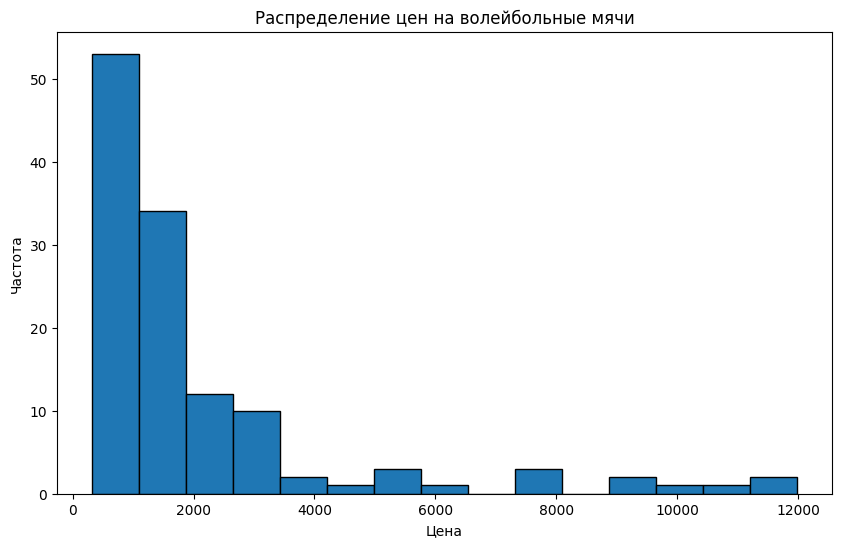

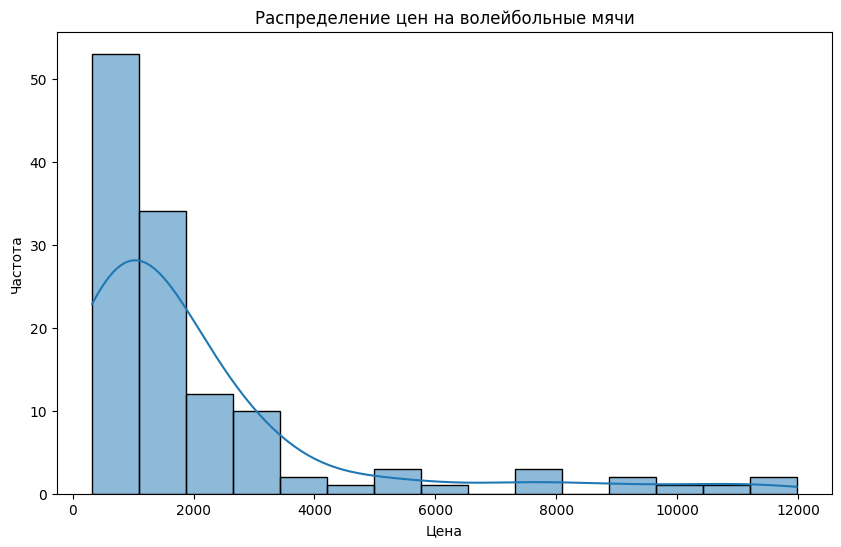

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

prices = []
for price_str in balls_price:
    try:
        price = float(price_str.replace(' ', ''))
        prices.append(price)
    except ValueError:
        print(f"Ошибка преобразования цены: {price_str}")
data = {'price': prices}
df = pd.DataFrame(data)



plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=15, edgecolor='black')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на волейбольные мячи')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=15)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на волейбольные мячи')
plt.show()



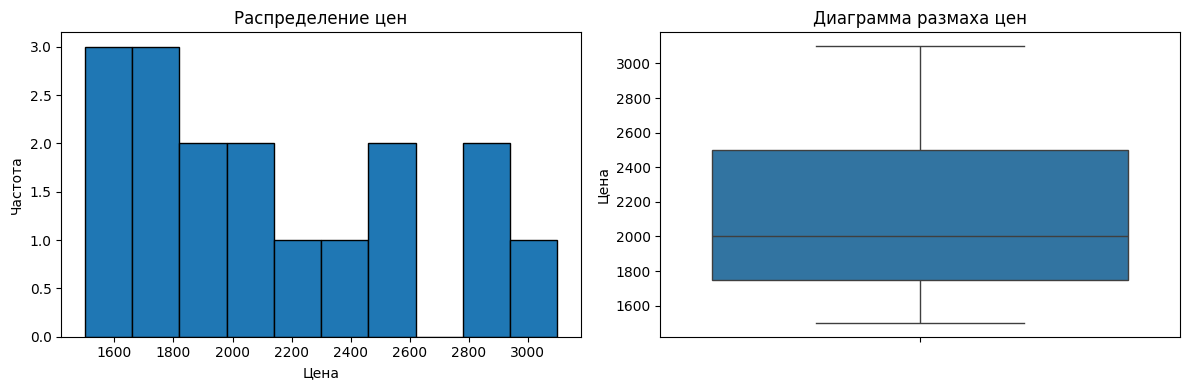

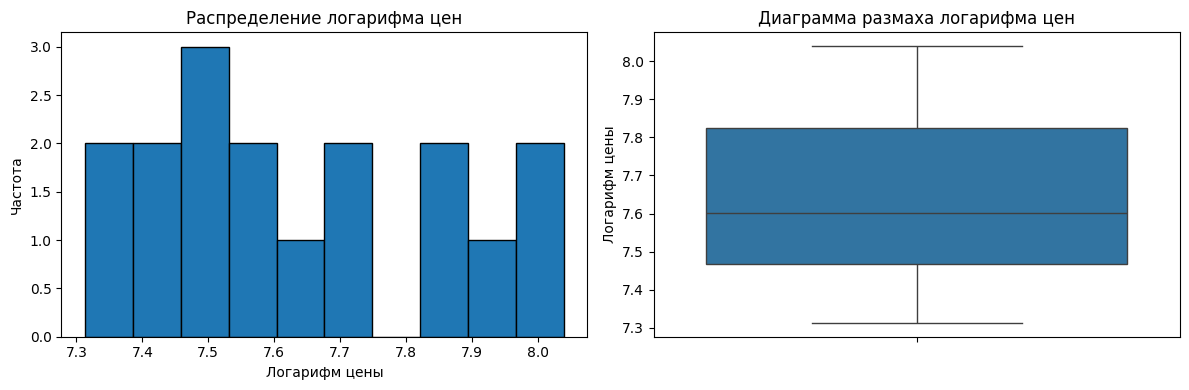

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


log_prices = []
for price in prices:
    if price > 0:
        log_prices.append(np.log(price))
    else:
        print(f"Цена равна нулю или отрицательна: {price}, пропуск.")

data = {'price': prices, 'log_price': log_prices}
df = pd.DataFrame(data)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=10, edgecolor='black')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.ylabel('Цена')
plt.title('Диаграмма размаха цен')

plt.tight_layout()


plt.show()




plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['log_price'], bins=10, edgecolor='black')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.title('Распределение логарифма цен')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['log_price'])
plt.ylabel('Логарифм цены')
plt.title('Диаграмма размаха логарифма цен')

plt.tight_layout()
plt.show()